## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


### Import necessary packages/libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

from scipy.stats import zscore

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
#Read/load the file where the columns are seperated by semicolon as the delimiter 
s_df = pd.read_csv('students-data.csv',sep=';')

In [3]:
s_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
s_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [6]:
# shape of the data-set
print('Shape of the dataset:\t{}'.format(s_df.shape))

Shape of the dataset:	(395, 33)


#### Find relationship between the variables

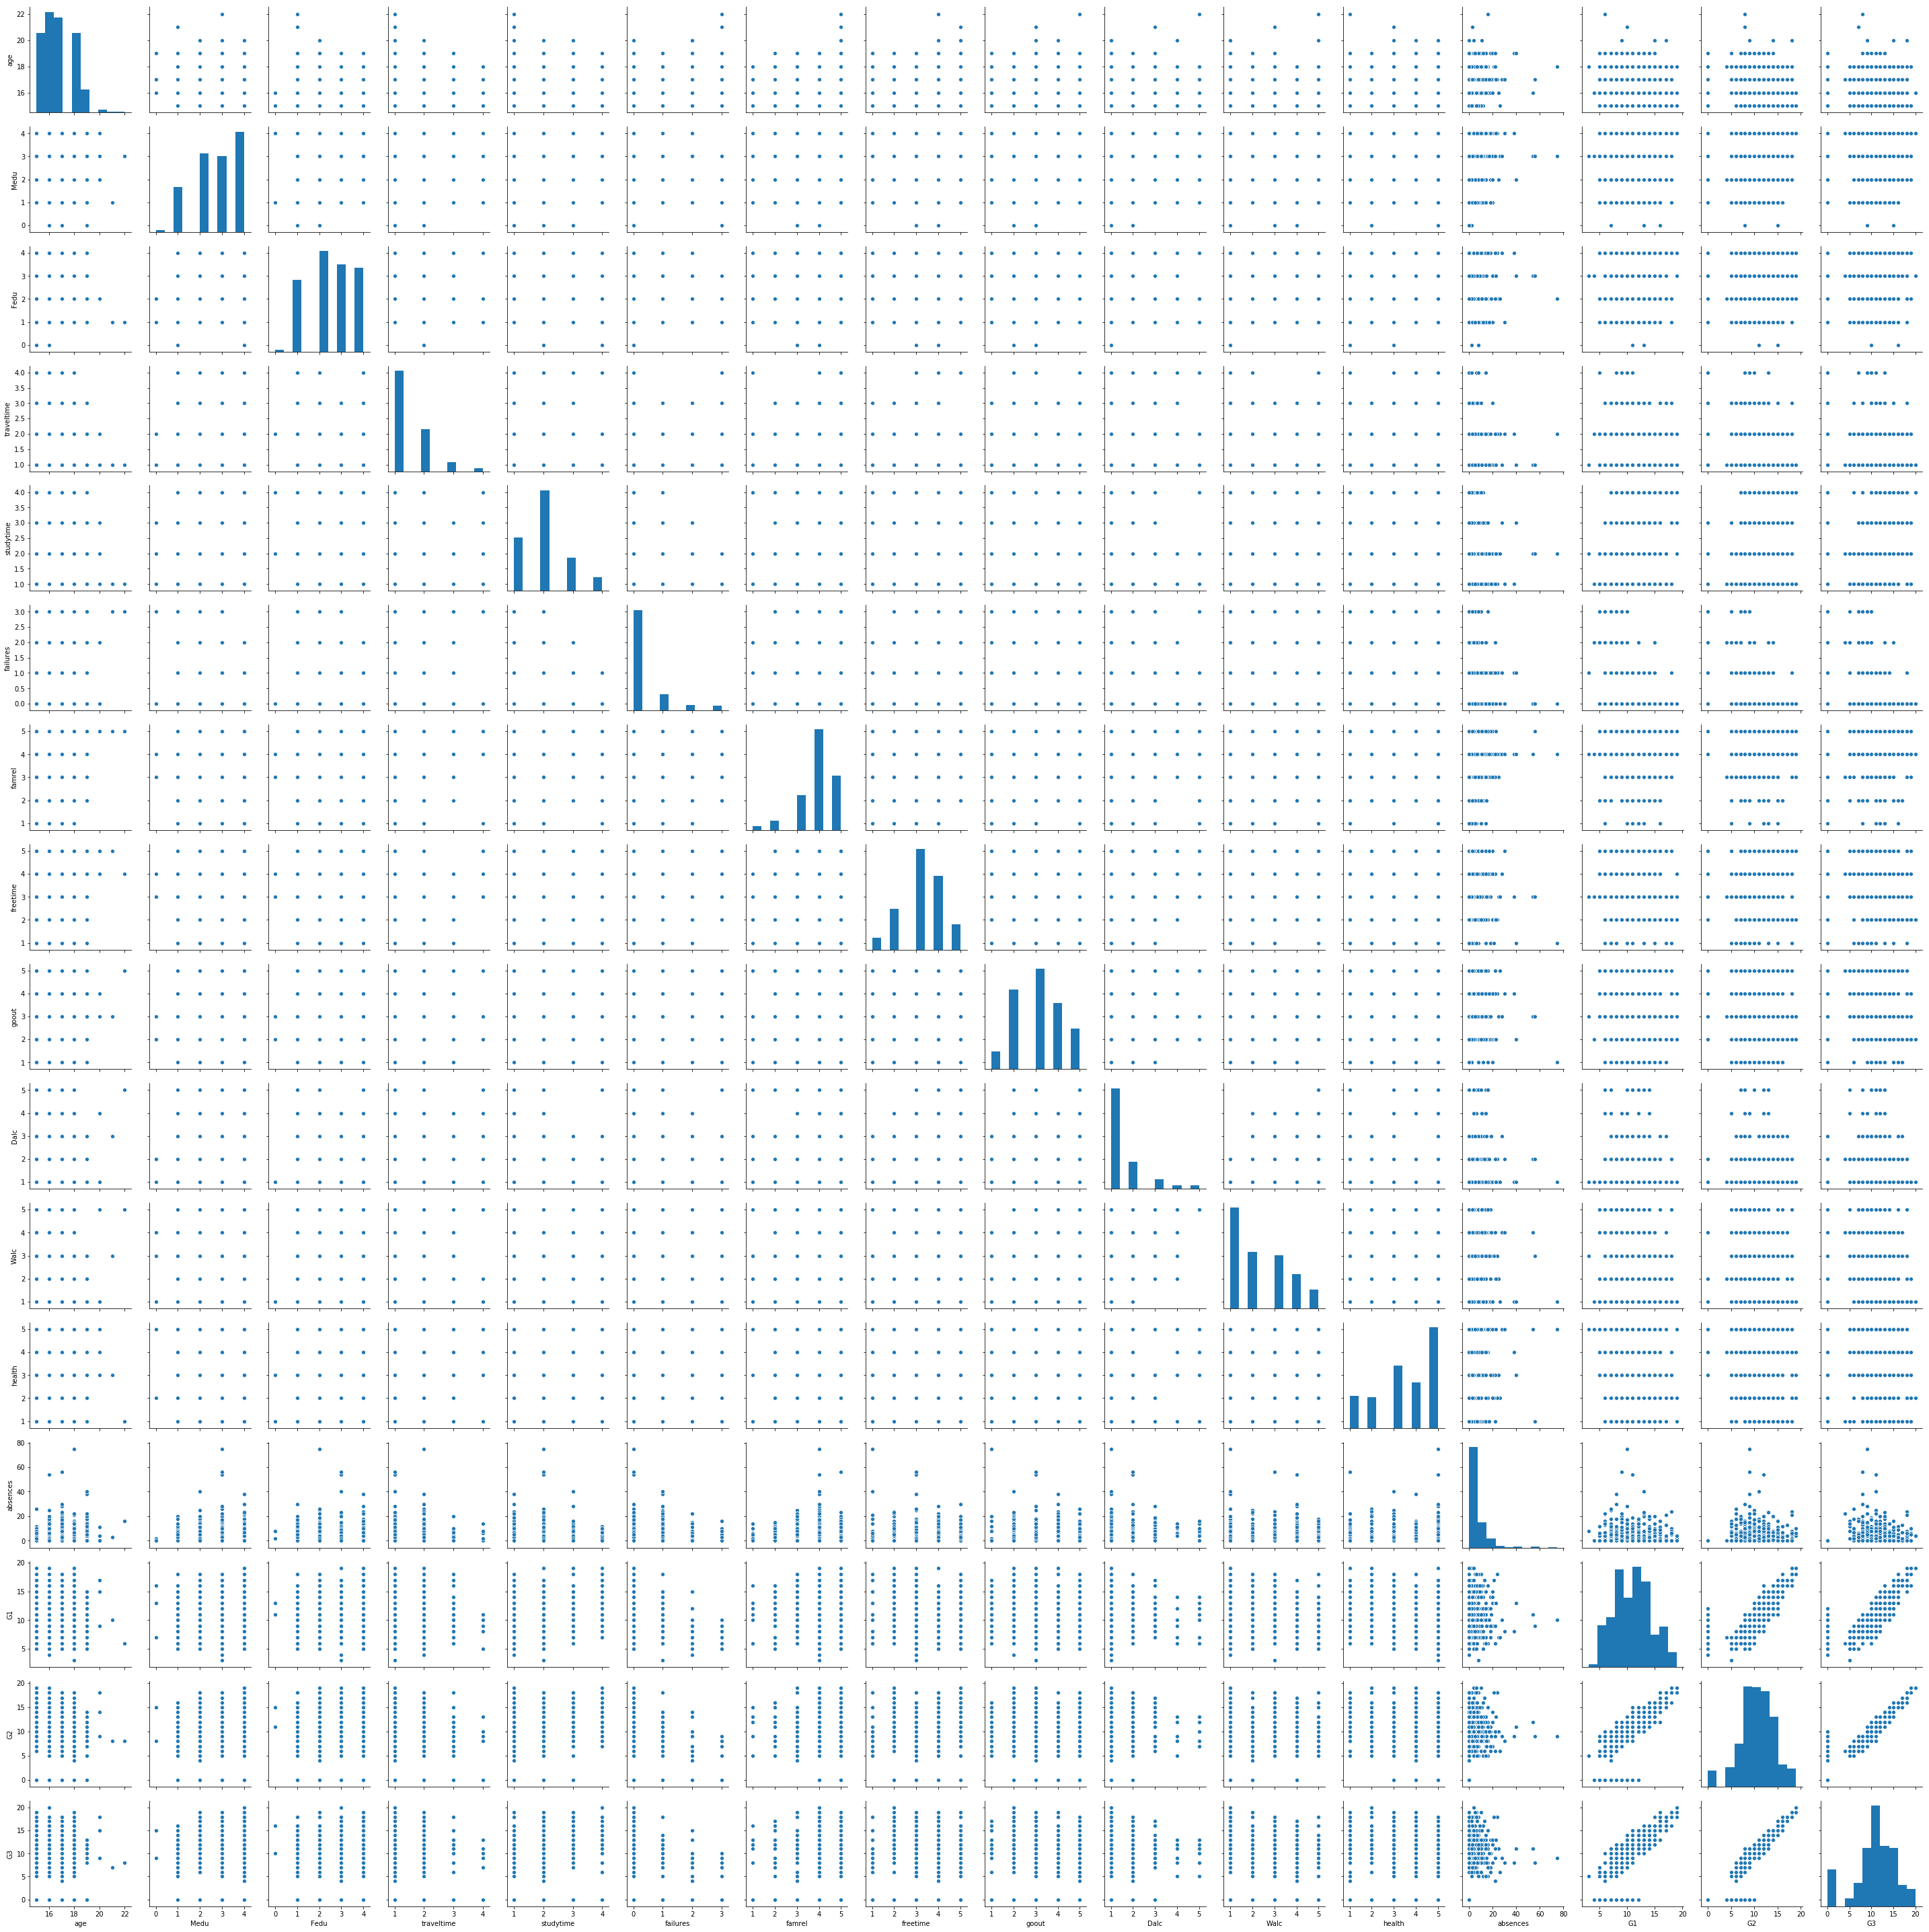

In [7]:
sns.pairplot(data=s_df)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [8]:
s_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
s_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
s_df.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

#### Inferences: 
    No missing values are observed

#### Find correlations between the variables

In [11]:
s_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


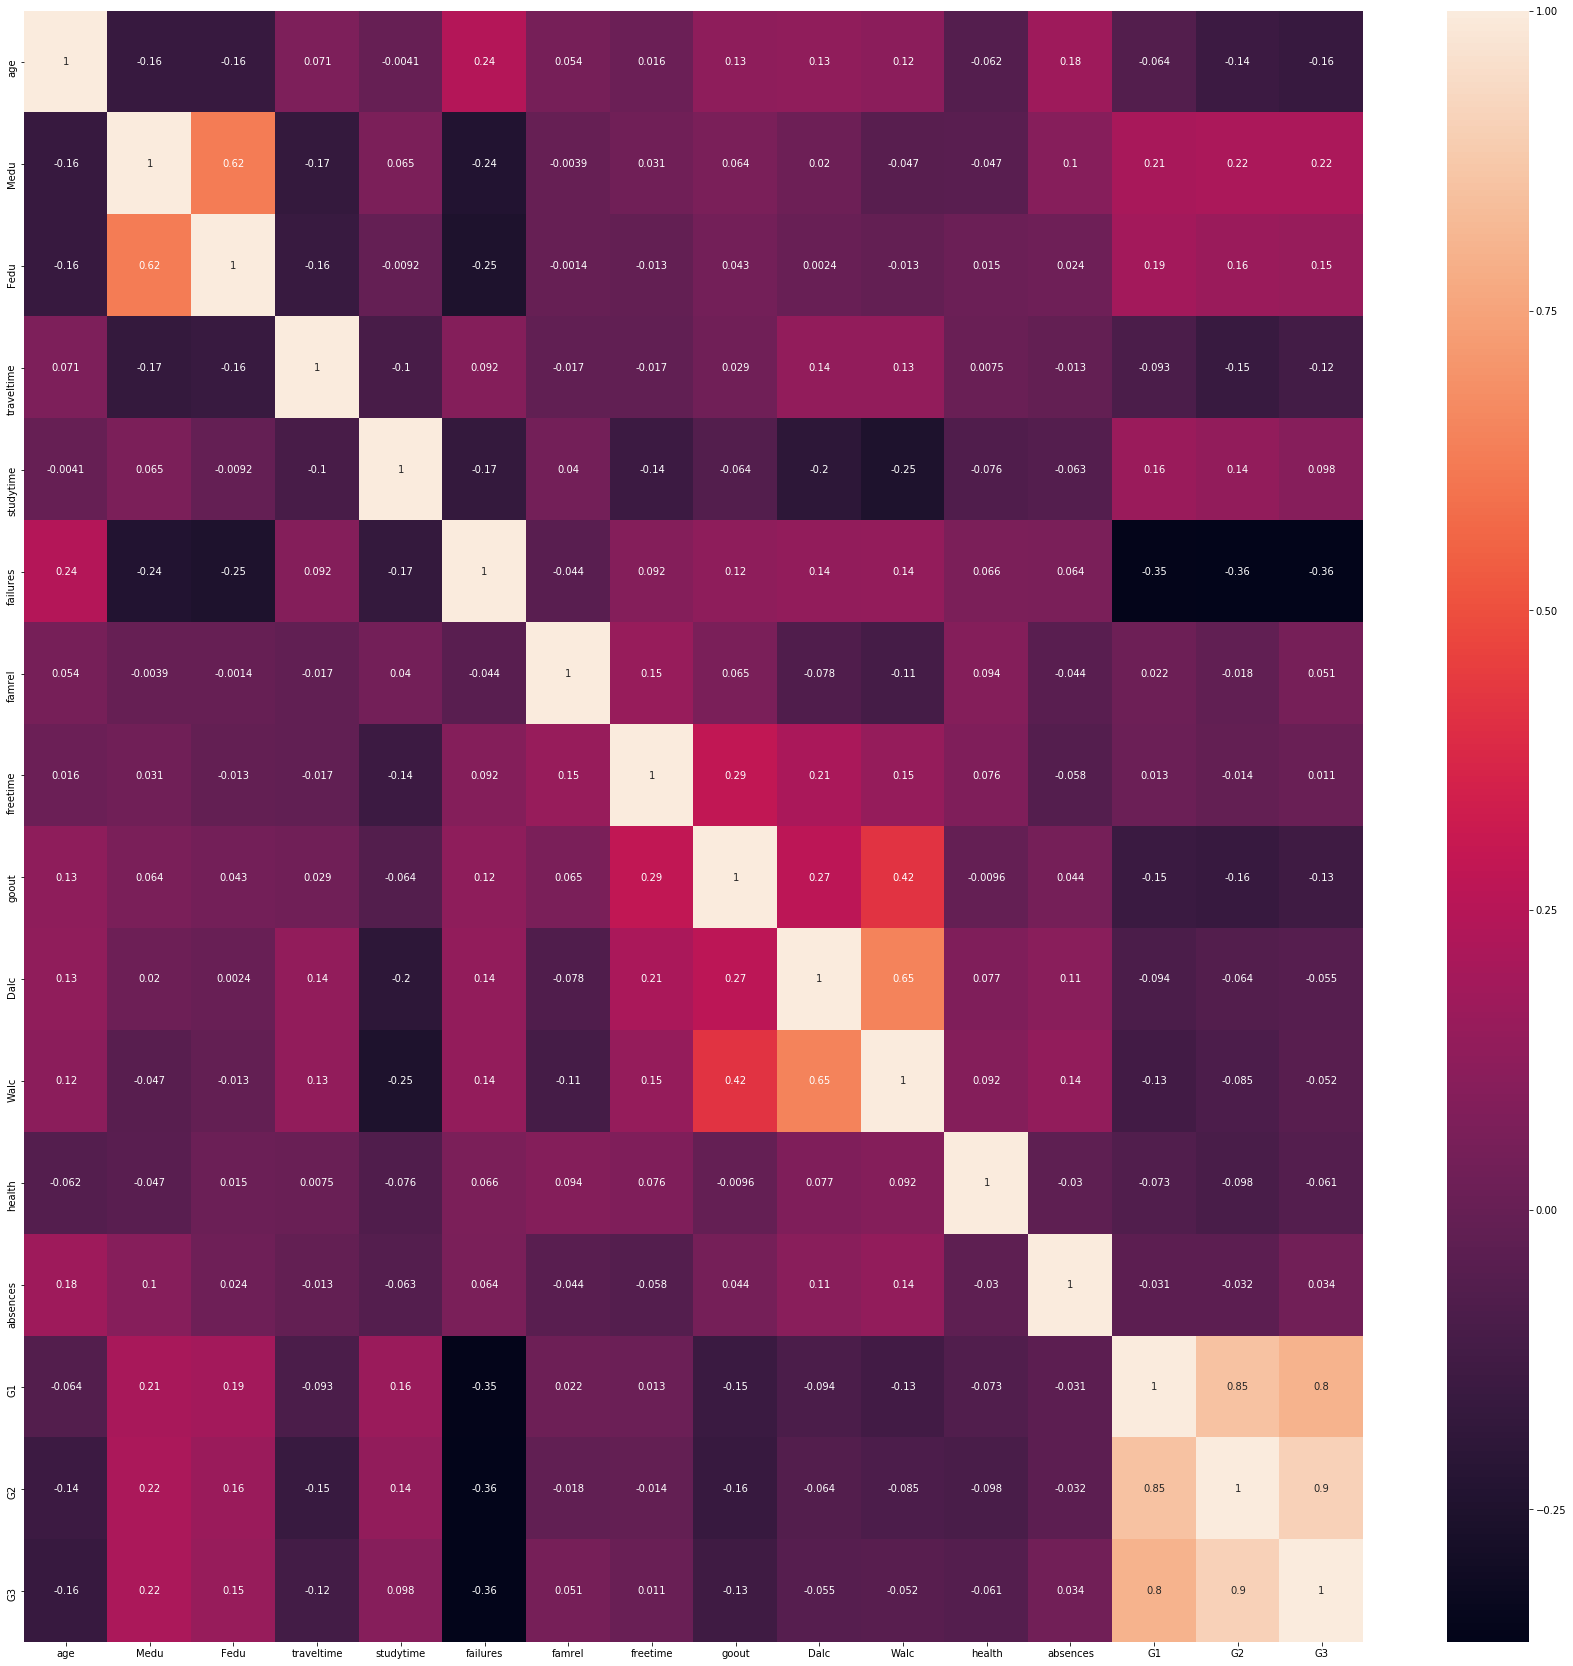

In [12]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(s_df.corr(),annot=True, ax=ax)

#### Inferences 
Target variable 'G3' has good relation with predictors 'G1' and 'G2' while comparing it with others

Also, other predictors such as 

    Fedu,Medu(parents education, which is being interpreted as education play a role in their marriage in choosing the partners ) has better relations
    
    goout,Walc has some relation(again as known going out with friends can indulge this behavior in an individual)
    
    Dalc,Walc too has good relations (interprted as, the alcohol consumption is same irrespctive of the day!)
    

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [13]:
s_df.select_dtypes(exclude=np.object).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [14]:
s_df.select_dtypes(exclude=np.object).sample(n=5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
158,16,2,2,3,1,0,4,2,2,1,2,3,2,17,15,15
216,17,4,3,1,2,2,3,4,5,2,4,1,22,6,6,4
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
283,18,1,1,2,2,0,5,4,4,1,1,4,4,8,9,10
327,17,2,2,4,1,0,4,4,5,5,5,4,8,11,10,10


#### TO-DO
Try to understand the model score before performing the scaling/transformation/normalization. Hence this operation will be
taken care later

In [15]:
#s_df =  s_df.select_dtypes(exclude=np.object).transform(zscore)

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [16]:
s_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [17]:
less_Var = (s_df.var() <1)

In [18]:
drop_labels = (less_Var[less_Var.values == True]).index

In [19]:
# Labels with var < 1 to be dropped
drop_labels

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [20]:
s_df.drop(labels=drop_labels, axis=1,inplace=True)

In [21]:
s_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [22]:
obj_col = s_df.select_dtypes(include=np.object).columns
obj_col

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [23]:
s_df.select_dtypes(include=np.object).sample(n=3)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
54,GP,F,U,LE3,A,other,other,other,mother,no,no,yes,no,yes,yes,yes,no
355,MS,F,U,GT3,T,services,services,course,father,no,yes,no,no,yes,yes,no,yes
42,GP,M,U,GT3,T,services,teacher,course,father,no,yes,no,yes,yes,yes,yes,no


In [24]:
# for readability purpose commented it
'''
for col in obj_col:
    print(s_df[col].value_counts())
    print('\n')
'''

"\nfor col in obj_col:\n    print(s_df[col].value_counts())\n    print('\n')\n"

In [25]:
le = LabelEncoder()

for col in obj_col:
    le.fit(s_df[col])
    s_df[col]=le.transform(s_df[col])
    

In [26]:
s_df.sample(n=3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
200,0,0,16,1,0,1,4,3,1,2,...,1,1,0,5,5,2,2,16,16,16
222,0,0,16,1,0,1,2,3,3,4,...,1,1,0,1,1,3,2,16,16,17
385,1,0,18,0,0,1,2,2,0,2,...,1,0,0,3,3,4,2,10,9,10


In [27]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

In [28]:
# for readability purpose commented it
'''
for col in obj_col:
    print(s_df[col].value_counts())
    print('\n')
'''

"\nfor col in obj_col:\n    print(s_df[col].value_counts())\n    print('\n')\n"

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

Create another variables and handle it. As below, a plot was asked against the target varibale, With the actuals after enconding it, the plot does not yield any valid info

In [29]:
for col in s_df.columns:
    if( (col == 'G1') | (col == 'G2') | (col=='G3')):      
        s_df['E'+'_'+col] = s_df[col].copy()
        s_df['E'+'_'+col] = (s_df['E'+'_'+col] >=10)
        s_df['E'+'_'+col].replace(to_replace=False, value=0,inplace=True)
        s_df['E'+'_'+col].replace(to_replace=True, value=1,inplace=True)

In [30]:
s_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Walc,health,absences,G1,G2,G3,E_G1,E_G2,E_G3
0,0,0,18,1,0,0,4,4,0,4,...,4,1,3,6,5,6,6,0.0,0.0,0.0
1,0,0,17,1,0,1,1,1,0,2,...,3,1,3,4,5,5,6,0.0,0.0,0.0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,10,0.0,0.0,1.0
3,0,0,15,1,0,1,4,2,1,3,...,2,1,5,2,15,14,15,1.0,1.0,1.0
4,0,0,16,1,0,1,3,3,2,2,...,2,2,5,4,6,10,10,0.0,1.0,1.0


In [31]:
s_df['E_G1']= s_df['E_G1'].astype(np.int)
s_df['E_G2']= s_df['E_G2'].astype(np.int)
s_df['E_G3']= s_df['E_G3'].astype(np.int)

In [32]:
s_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Walc,health,absences,G1,G2,G3,E_G1,E_G2,E_G3
0,0,0,18,1,0,0,4,4,0,4,...,4,1,3,6,5,6,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,3,1,3,4,5,5,6,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,2,1,5,2,15,14,15,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,2,2,5,4,6,10,10,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [33]:
#drop the target as well as derived columns 
X = s_df.drop(columns=['G3','E_G1','E_G2','E_G3'])

In [34]:
#Here, the actual 'GE' is not the target, whereas it is the dervied one
y = s_df['E_G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


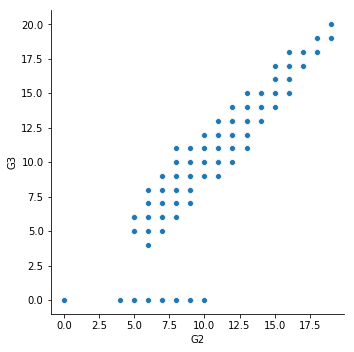

In [35]:
sns.pairplot(data=s_df,x_vars='G2',y_vars='G3',height=5)

#### Inference:

G2 and G3 have positive linear relationship with some outliers!

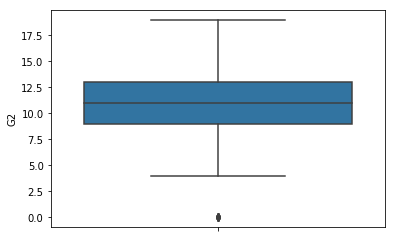

In [36]:
sns.boxplot(data=s_df,y='G2')

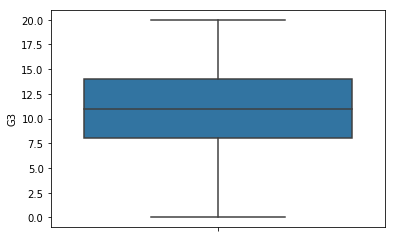

In [37]:
sns.boxplot(data=s_df,y='G3')

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

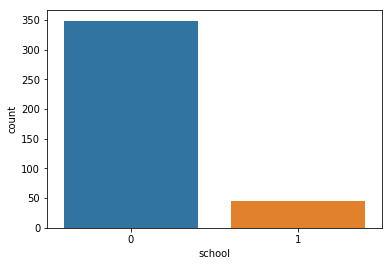

In [38]:
sns.countplot(data=s_df,x='school')

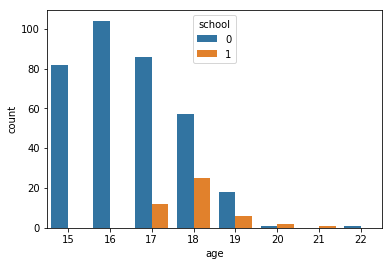

In [39]:
sns.countplot(data=s_df,x='age',hue='school')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=3)

In [41]:
print('Train size: {} {}'.format(x_train.shape,y_train.shape))
print('Test size: {} {}'.format(x_test.shape,y_test.shape))

Train size: (300, 26) (300,)
Test size: (95, 26) (95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [42]:
lgx_r = LogisticRegression()

In [43]:
# Build/fit the model using train data-set
lgx_r.fit(x_train,y_train)


C:\Users\Barani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_train_predicted= lgx_r.predict(x_train)

In [45]:
print('Train dataset\'s model accuracy is:\t %.02f%%'%(lgx_r.score(x_train,y_train)*100))

Train dataset's model accuracy is:	 94.33%


In [46]:
metrics.confusion_matrix(y_train,y_train_predicted)

array([[ 91,   8],
       [  9, 192]], dtype=int64)

In [47]:
print(metrics.classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.96      0.96      0.96       201

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



#### Model's accuracy and other metrics for test data-set

In [48]:
print('Test dataset\'s model accuracy is:\t %.02f%%'%(lgx_r.score(x_test,y_test)*100))

Test dataset's model accuracy is:	 88.42%


In [49]:
y_test_predicted= lgx_r.predict(x_test)

In [50]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.93      0.89      0.91        64

   micro avg       0.88      0.88      0.88        95
   macro avg       0.86      0.88      0.87        95
weighted avg       0.89      0.88      0.89        95



In [51]:
metrics.confusion_matrix(y_test,y_test_predicted)

array([[27,  4],
       [ 7, 57]], dtype=int64)

In [52]:
y_test.value_counts()

1    64
0    31
Name: E_G3, dtype: int64

### Inference for test data-set:
of 31 fail counts, model has predicted 27 as fail counts correctly and 4 as pass counts incorrectly

of 64 pass counts, model has predicted 57 as pass counts correctly and 7 as fail counts incorrectly

Refering the classification model's metrics such as precision/recall column, supports the above statement:


In [53]:
model_coeff_inter_df = pd.DataFrame(lgx_r.coef_,columns=x_train.columns)

In [54]:
print('Models coefficient parameter for predictors:\n')
model_coeff_inter_df.T

Models coefficient parameter for predictors:



,0
school,0.702387
sex,-0.375045
age,-0.730694
address,-0.195669
famsize,-0.689066
Pstatus,-1.023488
Medu,0.111289
Fedu,-0.581930
Mjob,-0.233152
Fjob,-0.115530


In [55]:
print('Model\'s Intercept parameter:\t', lgx_r.intercept_)


Model's Intercept parameter:	 [-0.27319874]


### Answer to Transform Data

In [56]:
X_transform = X.transform(zscore)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_transform,y,test_size=0.24,random_state=3)

In [58]:
print('Train size: {} {}'.format(x_train.shape,y_train.shape))
print('Test size: {} {}'.format(x_test.shape,y_test.shape))

Train size: (300, 26) (300,)
Test size: (95, 26) (95,)


In [59]:
lgx = LogisticRegression()
lgx.fit(x_train,y_train)
print('Train dataset\'s model accuracy is:\t %.02f%%'%(lgx.score(x_train,y_train)*100))

Train dataset's model accuracy is:	 94.33%


C:\Users\Barani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
print('Test dataset\'s model accuracy is:\t %.02f%%'%(lgx.score(x_test,y_test)*100))

Test dataset's model accuracy is:	 88.42%


### Observation: 

From the above it could be inferred that before and after applying normalisation the accuracy score on both train and data set is the same (i.e. ~94% and 88%).

### Note:
If the features of whose variance <1 not removed then too the models score before and after the feature scaling remains same (i.e ~97 & 89). 

For simplicity and readability it wasn't show here. May comment In [20] and can check

# Naive bayes with Iris data

### Import Iris.csv

In [61]:
i_df = pd.read_csv('Iris.csv')

In [62]:
i_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [64]:
i_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [65]:
# shape of the data-set
i_df.shape

(150, 5)

### Find for missing values

In [66]:
i_df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [67]:
i_df.count()

Sepal Length (in cm)    150
Sepal Width in (cm)     150
Petal length (in cm)    150
Petal width (in cm)     150
Class                   150
dtype: int64


Dataset doesn't have any variable with missing values 

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [68]:
X = i_df.drop(columns='Class')

In [69]:
y = i_df['Class']

### Find the distribution of target variable (Class)

In [70]:
y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

In [71]:
y.value_counts().index

Index(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype='object')

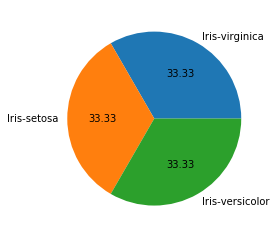

In [72]:
label=y.value_counts().index
value = y.value_counts().values 
plt.pie(x=value,labels=label,autopct='%.2f')
plt.show()

### Plot the distribution of target variable using histogram

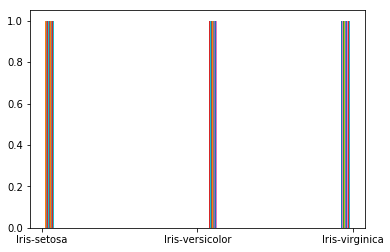

In [73]:
plt.hist(data=i_df, x='Class')
plt.show()

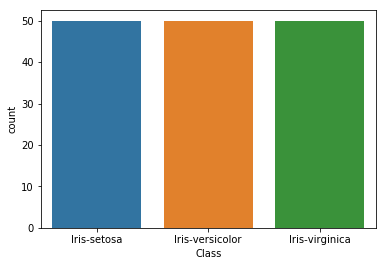

In [74]:
sns.countplot(data=i_df, x='Class')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

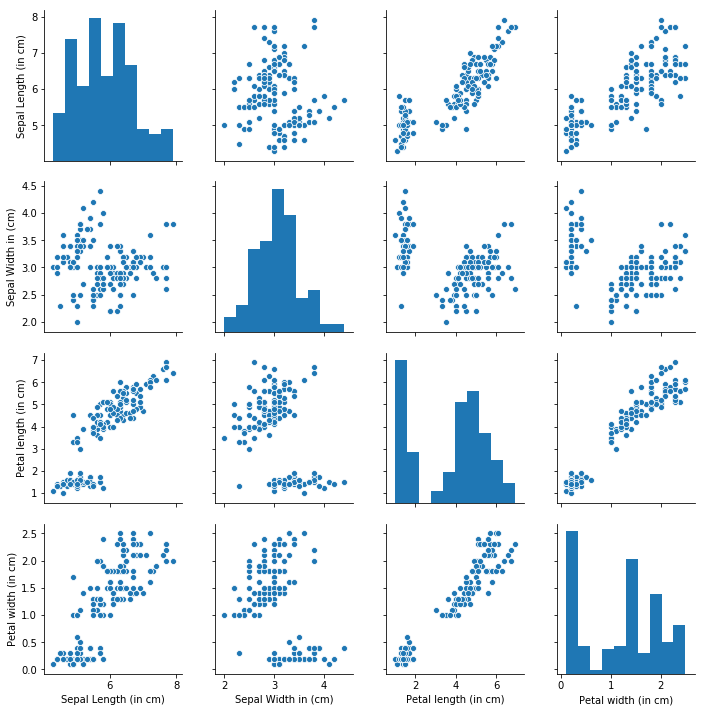

In [75]:
sns.pairplot(data=i_df)

#### Inferences:
    Sepal Length has good correlation with Petal length and Petal width and weak correlation with Sepal width
    Petal Length has good correlation with Petal width and Sepal length and weak correlation with Sepal width
    Petal Widht has good correlation with only Petal lenght & Sepal length and weak correlation with Sepal width
    Sepal width has weak correlation with all other variables

### Summary Statistics and explain insights for at least 2 variables

In [76]:
i_df['Sepal Width in (cm)'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal Width in (cm), dtype: float64

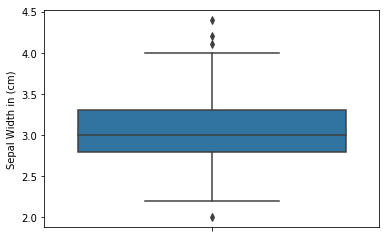

In [77]:
sns.boxplot(data=i_df,y='Sepal Width in (cm)')

The predictor Sepal width shapes seems to normally distributed and with low and high outliers

In [78]:
i_df['Petal width (in cm)'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal width (in cm), dtype: float64

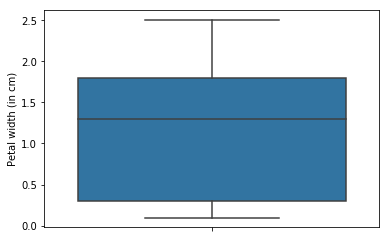

In [79]:
sns.boxplot(data=i_df,y='Petal width (in cm)')

The predictor Petal width shapes seems to left skewed and no outliers

### Correlation among all variables and give your insights

In [80]:
i_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


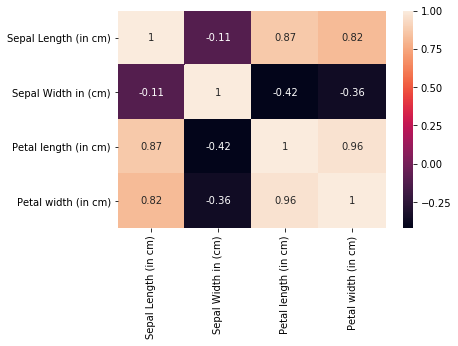

In [81]:
sns.heatmap(i_df.corr(),annot=True)

#### Inferences:
    Sepal Length has good correlation with Petal length and Petal width and weak correlation with Sepal width
    Petal Length has good correlation with Petal width and Sepal length and weak correlation with Sepal width
    Petal Widht has good correlation with only Petal lenght & Sepal length and weak correlation with Sepal width
    Sepal width has weak correlation with all other variables

### Split data in Training and Validation in 80:20

In [82]:
# Do the scaling before the split
X_scaled = X.transform(zscore)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=3)

In [84]:
print('Train size: {} {}'.format(x_train.shape,y_train.shape))
print('Test size: {} {}'.format(x_test.shape,y_test.shape))

Train size: (120, 4) (120,)
Test size: (30, 4) (30,)


### Do Feature Scaling

Shouldn't this performed before the split ?. I have done it before the split

### Train and Fit NaiveBayes Model

In [85]:
model = GaussianNB()


In [86]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
y_train_predicted= model.predict(x_train)

In [88]:
print('Train dataset\'s model accuracy is:\t %.02f%%'%(model.score(x_train,y_train)*100))

Train dataset's model accuracy is:	 95.00%


In [89]:
metrics.confusion_matrix(y_train,y_train_predicted)

array([[40,  0,  0],
       [ 0, 37,  3],
       [ 0,  3, 37]], dtype=int64)

In [90]:
print(metrics.classification_report(y_train, y_train_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.93      0.93        40
 Iris-virginica       0.93      0.93      0.93        40

      micro avg       0.95      0.95      0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



### Print Accuracy and Confusion Matrix and Conclude your findings

In [91]:
print('Test dataset\'s model accuracy is:\t %.02f%%'%(model.score(x_test,y_test)*100))

Test dataset's model accuracy is:	 96.67%


In [92]:
y_test_predicted= model.predict(x_test)

In [93]:
print(metrics.classification_report(y_test, y_test_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [94]:
metrics.confusion_matrix(y_test,y_test_predicted)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [95]:
y_test.value_counts()

Iris-virginica     10
Iris-setosa        10
Iris-versicolor    10
Name: Class, dtype: int64

### Inference for test data-set:
Of the actual 10 Iris-setosa class, all have been predicted accurately(i.e. 10) by the model

Of the actual 10 Iris-virginica class, all have been predicted accurately as 10

Of the actual 10 Iris-versicolor class, 9 have been predicted correctly and 1 have been predicted incorrectly as the class Iris-virginica

Refering the classification model's metrics such as precision/recall column, supports the above statement:


### EOF